## Imports and loading data

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import mlflow
import mlflow.sklearn
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

import logging
logging.getLogger("mlflow").setLevel(logging.WARNING)
logging.getLogger("sklearn").setLevel(logging.ERROR)

In [54]:
train = pd.read_csv('../data/train.gz', index_col="index")
test = pd.read_csv('../data/test.gz', index_col="index")

In [55]:
train.dtypes

chassisType      object
color            object
driveWheels      object
engineVolume    float64
fuelType         object
manufacturer     object
mileage         float64
model            object
modelYear         int64
asking_price    float64
power           float64
dtype: object

## Simple preprocessing

Creating a simple preprocessing function to experiment with different categorical variables.


In [56]:
def preprocess(df, categorical_features):
    """
    Preprocess a DataFrame for machine learning.

    This function performs the following steps:
    1. Removes rows with missing values (NaN).
    2. Converts specified categorical features into dummy variables (as integers).
    3. Removes all non-numeric columns from the DataFrame.
    4. Separates the target variable ('asking_price') from the features.

    Parameters:
        df (pd.DataFrame): The input DataFrame to preprocess.
        categorical_features (list of str): List of column names to be one-hot encoded.

    Returns:
        train_features (pd.DataFrame): Preprocessed feature DataFrame with numeric columns only.
        train_labels (pd.Series): Target variable ('asking_price') as a pandas Series.
    """
    # Drop rows with missing values
    dataset = df.copy()
    dataset = dataset.dropna()

    # Convert categorical features into dummy variables as integers
    for feature in categorical_features:
        dummies = pd.get_dummies(dataset[feature], prefix=feature, dtype=int)
        dataset = pd.concat([dataset, dummies], axis=1)
        dataset.drop(columns=[feature], inplace=True)

    # Separate the target variable ('asking_price')
    train_labels = dataset.pop('asking_price')

    # Keep only numeric columns for train_features
    train_features = dataset.select_dtypes(include=["number"])

    return train_features, train_labels


## Training simple model (Elastic Net)

Setting up MLflow experiment to track the different runs.

In [57]:
server_uri = "http://127.0.0.1:5000/"
mlflow.set_tracking_uri(server_uri)
mlflow.set_experiment("Simple Model - Feature selection")

<Experiment: artifact_location='mlflow-artifacts:/982113543130717146', creation_time=1734033598927, experiment_id='982113543130717146', last_update_time=1734033598927, lifecycle_stage='active', name='Simple Model - Feature selection', tags={}>

Experimenting with  different combinations of categorical features.

In [58]:
some_combinations = []
categorical_features = ['fuelType','driveWheels','manufacturer', 'chassisType']

for r in range(1, len(categorical_features) + 1):
        combinations = list(itertools.combinations(categorical_features, r))
        some_combinations.extend(combinations)

In [59]:
alpha = 0.5
l1_ratio = 0.5
random_state = 42

for feature_subset in some_combinations:
    train_features, train_labels = preprocess(train, categorical_features=feature_subset)
    test_features, test_labels = preprocess(test, categorical_features=feature_subset)

    with mlflow.start_run():
        # Instantiate and train the model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=random_state)
        model.fit(train_features, train_labels)
    
        # Evaluate the model
        y_train_pred = model.predict(train_features)
        y_test_pred = model.predict(test_features)

        # Calculate the MAPE
        train_mape = np.mean(np.abs((train_labels - y_train_pred) / train_labels)) * 100
        test_mape = np.mean(np.abs((test_labels - y_test_pred) / test_labels)) * 100

        # Log the model's metrics
        mlflow.log_param("feature_subset", feature_subset)
        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("train_mape", train_mape)
        mlflow.log_metric("test_mape", test_mape)

        mlflow.sklearn.log_model(model, "model")

        

2024/12/12 21:24:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run redolent-mink-462 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/05a9921117224912a62b9f7a794422ec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bouncy-robin-790 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/e2d5bc323f60415696b1328cc71a259c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run secretive-ray-333 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/80f43cc4e1d04e1ab9f66c0a74a0f2a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run peaceful-wren-80 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/36b68102e502478c898c1aecd4552920
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run languid-snipe-27 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/2a8bd7aef4254601a688b50d8f2818bf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run amusing-squid-925 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/bde246dab1174c27966698d7716741bf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run abrasive-ram-372 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/ba725c90d47c43baa626c45458490a7c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run wise-dolphin-520 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/9df248643609411184ac77c1414f1a84
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run grandiose-shrew-116 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/0c43c0ef207042aa800d4e219503839f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run popular-mare-117 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/d7975c38433b43c2b406976a201d87ee
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bemused-mole-65 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/103d665108e54b79a14cbdf1ab2ab614
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:24:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run sophisticated-kit-38 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/685b8516aa224c10938c3da01818676a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:25:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run victorious-frog-907 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/49b44ca3e5924a7cae3a6f7bc9a0de3c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:25:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run omniscient-eel-922 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/41e4b3949b5c470ab4ac54fa156adf4e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


2024/12/12 21:25:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run judicious-conch-250 at: http://127.0.0.1:5000/#/experiments/982113543130717146/runs/3c13020b08a94edeba911e5e19e0483a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/982113543130717146


### Output from the MLflow experiment

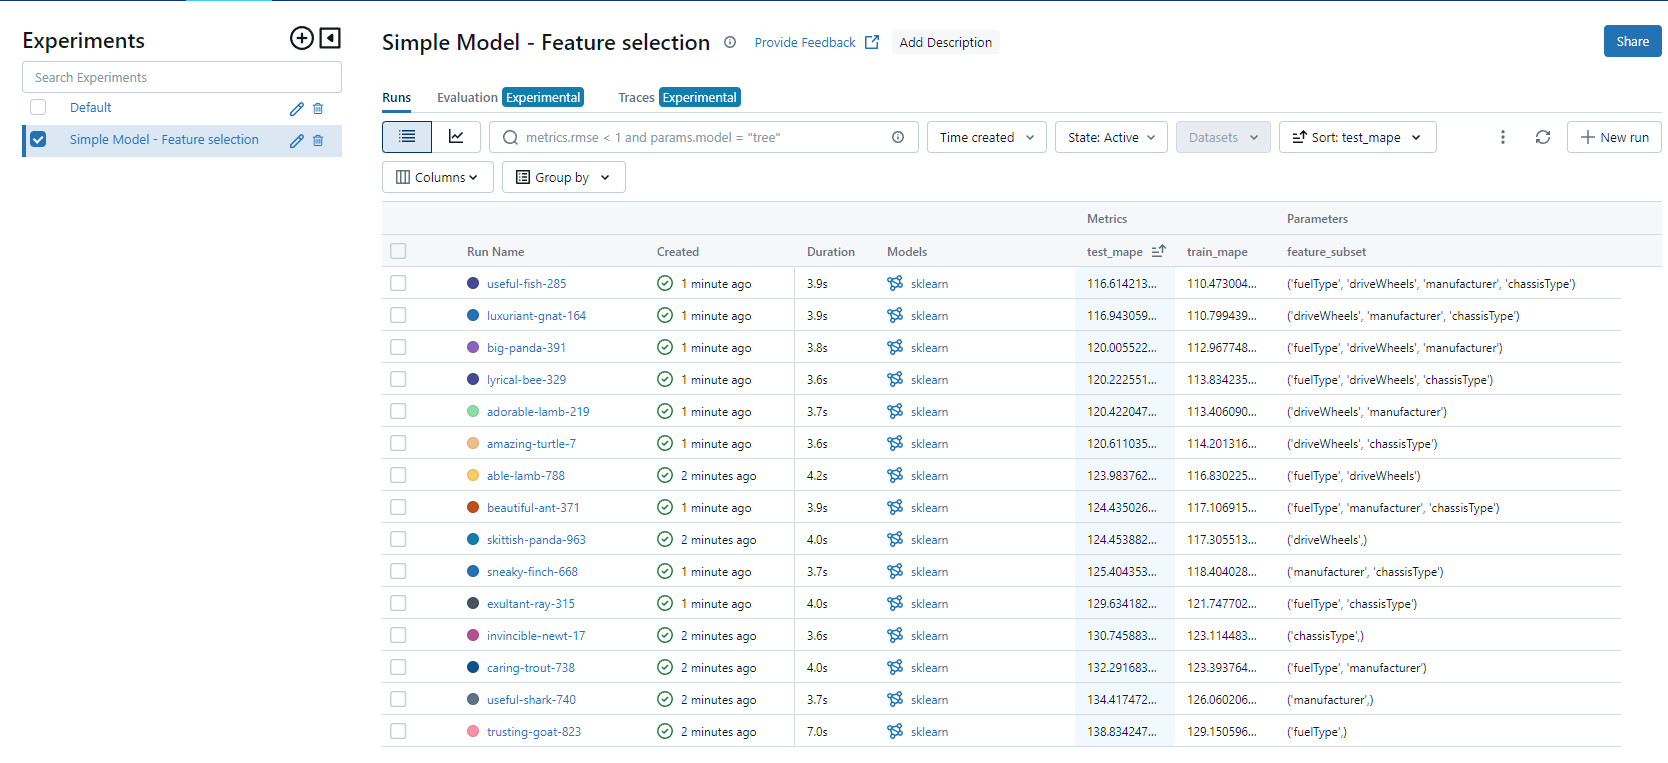

Looks like the best model is with the feature subset ('fuelType', 'driveWheels', 'manufacturer', 'chassisType')

Trying to tune it slightly.

In [60]:
categorical_features = ['fuelType', 'driveWheels', 'manufacturer', 'chassisType']
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.9]

In [61]:

mlflow.set_experiment("Simple Model - Regularization - ElasticNet")

for alpha in alphas:
    for l1_ratio in l1_ratios:
        with mlflow.start_run():
            # Instantiate and train the model
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=random_state)
            model.fit(train_features, train_labels)
        
            # Evaluate the model
            y_train_pred = model.predict(train_features)
            y_test_pred = model.predict(test_features)

            # Calculate the MAPE
            train_mape = np.mean(np.abs((train_labels - y_train_pred) / train_labels)) * 100
            test_mape = np.mean(np.abs((test_labels - y_test_pred) / test_labels)) * 100

            # Log the model's metrics
            mlflow.log_param("feature_subset", feature_subset)
            mlflow.log_param("alpha", alpha)
            mlflow.log_param("l1_ratio", l1_ratio)
            mlflow.log_metric("train_mape", train_mape)
            mlflow.log_metric("test_mape", test_mape)

            mlflow.sklearn.log_model(model, "model")

        

2024/12/12 21:25:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run intelligent-cow-948 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/178e4ba0914c45899b4db337b489ac92
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run thundering-slug-339 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/b54c646732af484098fa16fc6b6e123e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


c:\Users\fredr\Documents\Fredrik\Søknader\Finn - Data Scientist Mobility\case\finn-valuation-tool\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.980e+13, tolerance: 5.524e+10
  model = cd_fast.enet_coordinate_descent(
2024/12/12 21:25:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run luxuriant-shad-999 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/653745c97e084a0ebdad7abc888d877e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run sincere-midge-524 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/ddbf9d379379445c928cf8f097f9f125
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run magnificent-wolf-298 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/3668d54ac61b483db708cd840555ea3e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run nosy-ram-572 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/c6fa4f7ed00d4278a94c7705d58a1521
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run wistful-mink-966 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/ad3a4e46a7294cc78843fa11aaa4a407
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run likeable-boar-945 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/e332dbc9719c4cafb8c6415b4c34fb5c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run rare-grouse-173 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/b260d5d1620e4925bff24c863a9c0af1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:25:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run youthful-asp-181 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/a41b04c2fe964bc8aa1a5c11ede9444e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:26:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run brawny-bass-744 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/9a570449051a497baee5bc6c40e7752a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


2024/12/12 21:26:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run able-shrew-352 at: http://127.0.0.1:5000/#/experiments/866046307195573801/runs/7e7df42515d54bcfb79c2ab5efdec071
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/866046307195573801


## Results from MLflow experiment

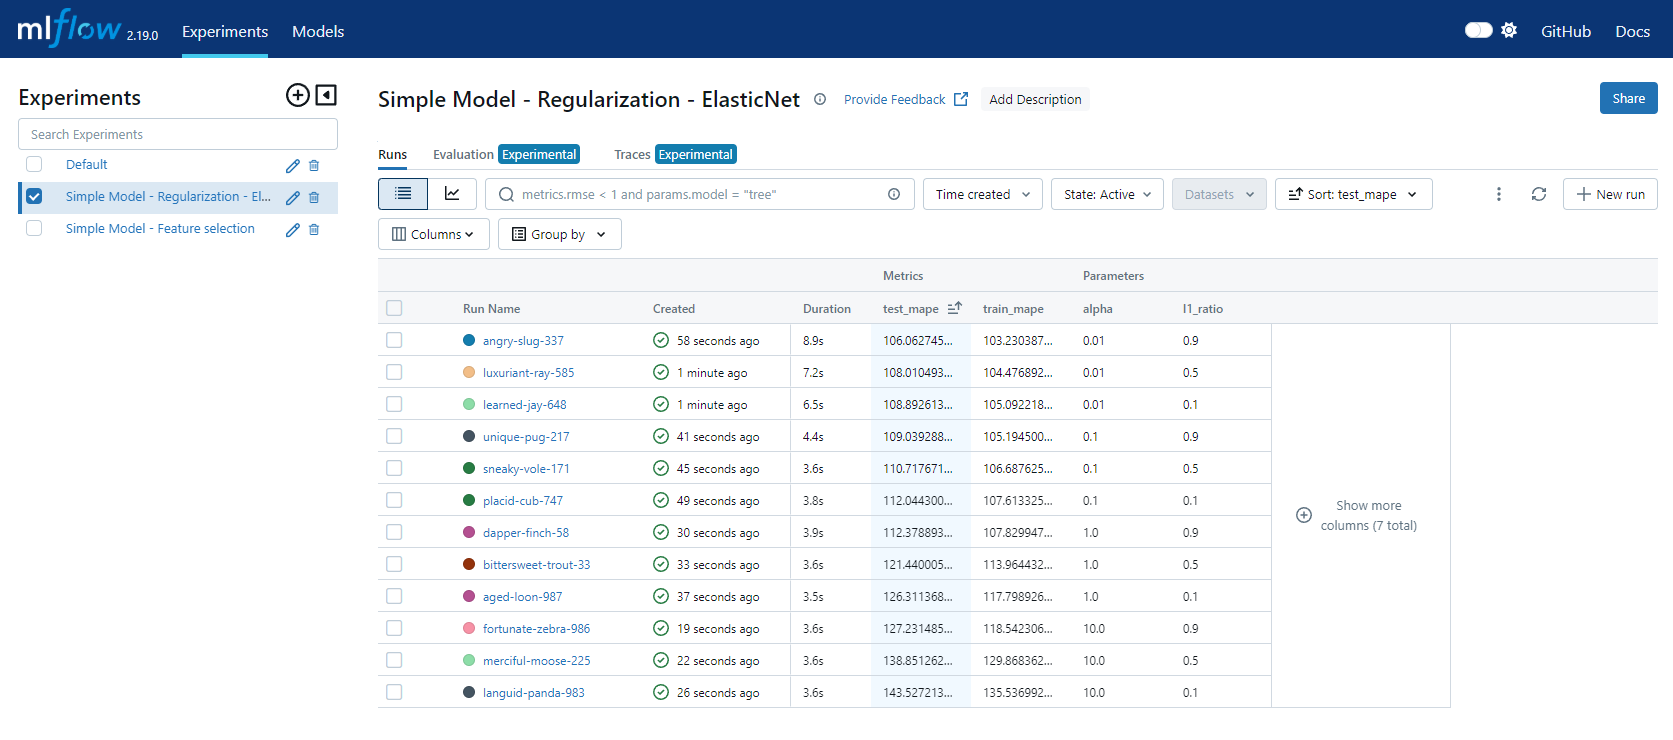

### Observations

I realize that the models are pretty useless measured by MAPE. But there is some hints in the assignement that ask me to reflect on MAPE as a metric here. MAPE is sensitive to outliers/extreme values. Let's look at the distribution of the absolute errors. Using the best parameters/settings from the experiments to generate predictions.

In [62]:
alpha = 0.01
l1_ratio = 0.9
random_state = 42
categorical_features = ['fuelType', 'driveWheels', 'manufacturer', 'chassisType']

train_features, train_labels = preprocess(train, categorical_features=categorical_features)
test_features, test_labels = preprocess(test, categorical_features=categorical_features)

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=random_state)
model.fit(train_features, train_labels)

c:\Users\fredr\Documents\Fredrik\Søknader\Finn - Data Scientist Mobility\case\finn-valuation-tool\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.980e+13, tolerance: 5.524e+10
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.9, random_state=42)

Making some predictions and inspecting the distribution of the absolute errors.

In [63]:
y_train_pred = model.predict(train_features)
y_test_pred = model.predict(test_features)

In [64]:
# Calculate MAPE (Mean Absolute Percentage Error)
train_mape = np.mean(np.abs((train_labels - y_train_pred) / train_labels)) * 100
test_mape = np.mean(np.abs((test_labels - y_test_pred) / test_labels)) * 100

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Validation MAPE: {test_mape:.2f}%")

Training MAPE: 103.23%
Validation MAPE: 106.06%


## Model performance
The model performance measured in MAPE is very weak. But there is some hints in the assignment that one should reflect on the MAPE metric here. It is known for being inflated by extreme values. Lets look at the distribution of absolute percentage errors (APE) for the training set.

In [65]:
inspection = pd.DataFrame({'asking_price': train_labels, 'predicted_price': y_train_pred})
inspection['APE'] = (inspection['asking_price'] - inspection['predicted_price']).abs() / inspection['asking_price'] * 100
inspection.head()

,asking_price,predicted_price,APE
index,,,
0,115937.0,177130.276563,52.781490
1,160837.0,190177.216418,18.242206
2,229886.0,215403.004128,6.300077
3,130500.0,176158.433250,34.987305
4,143937.0,189011.117070,31.315171


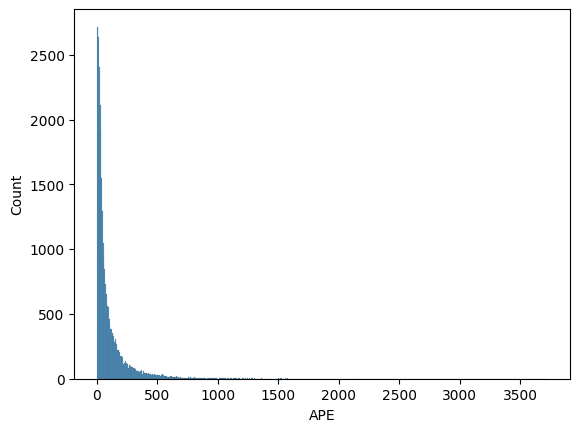

In [66]:
# Plotting the distribution of APE
sns.histplot(inspection['APE'])
plt.show()


## Looks like some outliers are inflating the metric.
Calculating Median Absolute Percentage Error (MAPE*) in addition to Mean Absolute Percentage Error (MAPE).

In [67]:
# Calculate MAPE* (Median Absolute Percentage Error)
train_mape_ = np.median(np.abs((train_labels - y_train_pred) / train_labels)) * 100
test_mape_ = np.median(np.abs((test_labels - y_test_pred) / test_labels)) * 100

print(f"Training MAPE*: {train_mape_:.2f}%")
print(f"Validation MAPE*: {test_mape_:.2f}%")

Training MAPE*: 44.69%
Validation MAPE*: 48.94%


## Looks better, but not great.

a. Reflect on the MAPE, what does it tell you? Is this score good?  

The MAPE tells us how much we miss with on average, so with a MAPE of 106% we are on average off by 106% of the actual asking price. So this is not good at all if one is to look at it in isolation. But in this case it doesn't tell the whole story, as some of the extreme errors inflates the average.

If one looks at the Median Absolute Percentage Error, it is about 48% on the validation data. Which means that the median miss on a 100 000 NOK car is +- 48 000 NOK, which still is pretty bad.

b. What does the difference in MAPE on the training set and test set tell you? Is this good? 

There is a small difference in the MAPE (both on the average and median version). The difference is not that big, but this means that there is a slight overfitting on the training set. But still, the difference is not that big, and the model seems to be generalizing well to the test set.

2. If you were to train an even more sophisticated model, with orders of magnitude more training data at your disposal, which model would you pick, and why? How do you think the new model would compare to the model you created for part 1?

In the simple model I tried to avoid the curse of dimensionality, which could become a problem when one hot encoding categorical variables with high cardinality.

